<a href="https://colab.research.google.com/github/ChrisStavropoulos/AI-in-Cybersecurity/blob/main/IPS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Εισαγωγή βιβλιοθηκών - πακέτων
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import os

In [2]:
# Συνάρτηση εισαγωγής συνόλου δεδομένων
def load_dataset(url='https://raw.githubusercontent.com/kdemertzis/EKPA/refs/heads/main/Data/pcap_data.csv'):
    df = pd.read_csv(url)
    X = df.drop('target', axis=1).values
    y = df['target'].values
    return X, y

In [3]:
# Φόρτωση δεδομένων
X, y = load_dataset()
df = pd.read_csv('https://raw.githubusercontent.com/kdemertzis/EKPA/refs/heads/main/Data/pcap_data.csv')
print("Data Shape:", df.shape)
print("Columns:", df.columns)

Data Shape: (14967, 26)
Columns: Index(['Avg_syn_flag', 'Avg_urg_flag', 'Avg_fin_flag', 'Avg_ack_flag',
       'Avg_psh_flag', 'Avg_rst_flag', 'Avg_DNS_pkt', 'Avg_TCP_pkt',
       'Avg_UDP_pkt', 'Avg_ICMP_pkt', 'Duration_window_flow', 'Avg_delta_time',
       'Min_delta_time', 'Max_delta_time', 'StDev_delta_time',
       'Avg_pkts_lenght', 'Min_pkts_lenght', 'Max_pkts_lenght',
       'StDev_pkts_lenght', 'Avg_small_payload_pkt', 'Avg_payload',
       'Min_payload', 'Max_payload', 'StDev_payload', 'Avg_DNS_over_TCP',
       'target'],
      dtype='object')


In [4]:
# Προεπεξεργασία δεδομένων
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
labels_categorical = to_categorical(labels_encoded)

In [5]:
# Κανονικοποίηση των δεδομένων
scaler = MinMaxScaler()
features_normalized = scaler.fit_transform(features)

In [6]:
# Διαχωρισμός των δεδομένων
X_train, X_test, y_train, y_test = train_test_split(
    features_normalized, labels_categorical, test_size=0.2, random_state=42, stratify=labels_encoded
)

In [7]:
# Δημιουργία του μοντέλου
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(labels_categorical.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           1,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,843 (15.01 KB)

 Trainable params: 3,843 (15.01 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Εκπαίδευση του μοντέλου
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4091 - loss: 1.0788 - val_accuracy: 0.7152 - val_loss: 0.8549
Epoch 2/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6108 - loss: 0.8828 - val_accuracy: 0.8046 - val_loss: 0.6517
Epoch 3/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6983 - loss: 0.7429 - val_accuracy: 0.8063 - val_loss: 0.5854
Epoch 4/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7372 - loss: 0.6933 - val_accuracy: 0.8434 - val_loss: 0.5109
Epoch 5/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7631 - loss: 0.6554 - val_accuracy: 0.8480 - val_loss: 0.4831
Epoch 6/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7734 - loss: 0.6322 - val_accuracy: 0.8526 - val_loss: 0.4786
Epoch 7/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7876 - loss: 0.6071 - val_accuracy: 0.8660 - val_loss: 0.4512
Epoch 8/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8040 - loss: 0.5827 - val_accuracy: 0.

In [9]:
# Αξιολόγηση του μοντέλου
eval_results = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy:", eval_results[1])

Test Accuracy: 0.8934535980224609


In [10]:
# Πρόβλεψη και ανίχνευση απειλών
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [11]:
# Πίνακας Σύγχυσης και Αναφορά Ταξινόμησης
cm = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:\n", cm)
target_names = [str(cls) for cls in label_encoder.classes_]
print("Classification Report:\n", classification_report(y_true, y_pred_classes, target_names=target_names))


Confusion Matrix:
 [[850  93  58]
 [ 48 916  39]
 [ 49  32 909]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.85      0.87      1001
         1.0       0.88      0.91      0.90      1003
         2.0       0.90      0.92      0.91       990

    accuracy                           0.89      2994
   macro avg       0.89      0.89      0.89      2994
weighted avg       0.89      0.89      0.89      2994



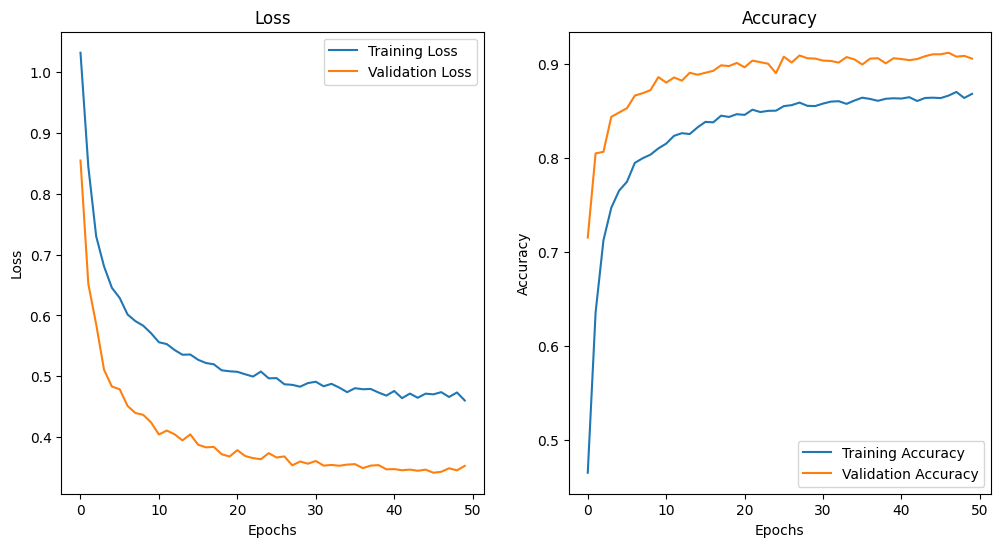

In [12]:
# Σχεδίαση της ακρίβειας εκπαίδευσης
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [13]:
# Συνάρτηση αποκλεισμού διευθύνσεων IP μέσω iptables (παράδειγμα για Linux)
def block_ip(ip):
    print(f"[ALERT] Blocking IP: {ip}")
    # Παράδειγμα εντολής αποκλεισμού (Linux)
    # os.system(f"iptables -A INPUT -s {ip} -j DROP")

In [14]:
# Συνάρτηση ειδοποίησης διαχειριστή
def notify_admin(ip, threat_type):
    print(f"[NOTIFICATION] Suspicious activity detected from {ip}. Threat type: {threat_type}")

In [15]:
# Συνάρτηση ανίχνευσης και πρόληψης
suspicious_ips = []  # Αποθήκευση ύποπτων IP για αποκλεισμό
for idx, (pred, true) in enumerate(zip(y_pred_classes, y_true)):
    if pred != true:  # Αν το μοντέλο ανιχνεύσει απειλή
        ip = df.iloc[idx, 0]  # Υποθέτουμε ότι η IP είναι στην πρώτη στήλη
        print(f"[THREAT DETECTED] IP: {ip}, Predicted: {pred}, Actual: {true}")
        if ip not in suspicious_ips:
            suspicious_ips.append(ip)
            block_ip(ip)
            notify_admin(ip, "Detected Threat")

print("Suspicious IPs blocked:", suspicious_ips)

[THREAT DETECTED] IP: 0.3325976013555931, Predicted: 2, Actual: 1
[ALERT] Blocking IP: 0.3325976013555931
[NOTIFICATION] Suspicious activity detected from 0.3325976013555931. Threat type: Detected Threat
[THREAT DETECTED] IP: 0.6574073629368482, Predicted: 2, Actual: 0
[ALERT] Blocking IP: 0.6574073629368482
[NOTIFICATION] Suspicious activity detected from 0.6574073629368482. Threat type: Detected Threat
[THREAT DETECTED] IP: -0.3143062416525837, Predicted: 1, Actual: 0
[ALERT] Blocking IP: -0.3143062416525837
[NOTIFICATION] Suspicious activity detected from -0.3143062416525837. Threat type: Detected Threat
[THREAT DETECTED] IP: -4.763834007783883, Predicted: 1, Actual: 2
[ALERT] Blocking IP: -4.763834007783883
[NOTIFICATION] Suspicious activity detected from -4.763834007783883. Threat type: Detected Threat
[THREAT DETECTED] IP: 0.5628392270667122, Predicted: 2, Actual: 0
[ALERT] Blocking IP: 0.5628392270667122
[NOTIFICATION] Suspicious activity detected from 0.5628392270667122. Threat